In [30]:
import datetime
import torch
import torch.nn as nn
import os
from torch.optim import Adam
import torch.nn.functional as F
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import skimage.measure
from torch.utils.data import DataLoader

In [31]:
path = (r'C:\Users\mylar\OneDrive\Área de Trabalho\MovingMNIST-main')

data loaded


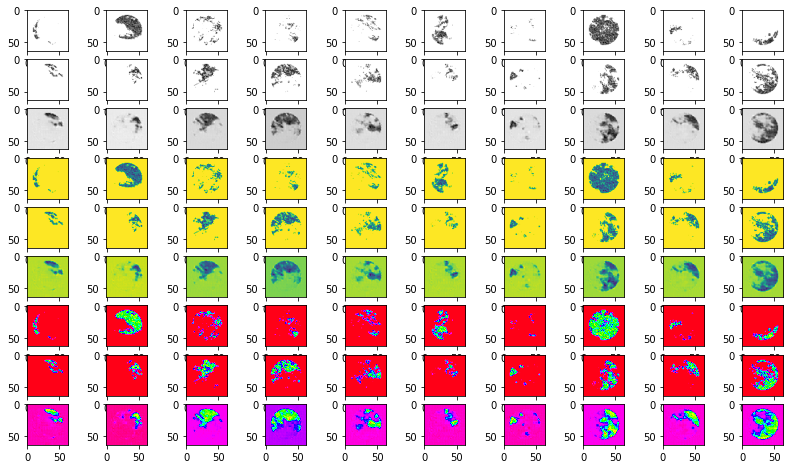

In [46]:
def reshape_back(patch_tensor):
    patch_tensor = patch_tensor.detach().cpu().numpy()
    patch_size = 4
    assert 5 == patch_tensor.ndim
    batch_size = np.shape(patch_tensor)[0]
    seq_length = np.shape(patch_tensor)[1]
    patch_height = np.shape(patch_tensor)[2]
    patch_width = np.shape(patch_tensor)[3]
    channels = np.shape(patch_tensor)[4]
    img_channels = channels // (patch_size * patch_size)
    a = np.reshape(patch_tensor, [batch_size, seq_length,
                                  patch_height, patch_width,
                                  patch_size, patch_size,
                                  img_channels])
    b = np.transpose(a, [0, 1, 2, 4, 3, 5, 6])
    img_tensor = np.reshape(b, [batch_size, seq_length,
                                patch_height * patch_size,
                                patch_width * patch_size,
                                img_channels])
    return img_tensor

def reshape_tensor(x, y):
    # output = model()
    # x, y = next(iter(train_loader))  # B, T, H, W
    patch_size = 4
    # batch_size = np.shape(x_train_np)[0]
    # print(x.shape)
    input_tensor = torch.cat([x, y], dim=1)
    # print(input_tensor.shape)
    batch_size, seq_length, num_channels, img_height, img_width = input_tensor.unsqueeze(2).shape  # B, T, C, H, W
    # print(batch_size, seq_length)
    a = torch.reshape(input_tensor, [batch_size, seq_length,
                                    img_height // patch_size, patch_size,
                                    img_width // patch_size, patch_size,
                                    num_channels])
    b = torch.transpose(a, 3, 4)
    patch_tensor = torch.reshape(b, [batch_size, seq_length,
                                     img_height // patch_size,
                                     img_width // patch_size,
                                     patch_size * patch_size * num_channels])
    input_tensor = patch_tensor.to(device)
    #print(x_train.shape)
    #output, loss = model(x_train, mask_true)
    #print(output.shape, loss.data)
    return input_tensor

def draw_prediction():
    x, y = next(iter(train_loader)) # B, T, H, W
    inputs = reshape_tensor(x, torch.zeros_like(x))
    outputs, loss = model(inputs, mask_true)
    y_pred = reshape_back(outputs)
    
    np.save(os.path.join(path,'target'),np.array(y.detach().cpu()))
   
    np.save(os.path.join(path,'prediction'),np.array(y_pred))
    
    
    fig, axes = plt.subplots(nrows=9, ncols=10, figsize=(14, 8))
    for i in range(10):
        axes[0][i].imshow(x[0, i, :, :],cmap="gray")
        axes[1][i].imshow(y[0, i, :, :],cmap="gray")
        axes[2][i].imshow(y_pred[0, i+9, :, :, 0],cmap="gray")
        
        axes[3][i].imshow(x[0, i, :, :])
        axes[4][i].imshow(y[0, i, :, :])
        axes[5][i].imshow(y_pred[0, i+9, :, :, 0])
        
        axes[6][i].imshow(x[0, i, :, :],cmap="hsv") 
        axes[7][i].imshow(y[0, i, :, :],cmap="hsv")
        axes[8][i].imshow(y_pred[0, i+9, :, :, 0],cmap="hsv")
        
        
    plt.show()
    
    

if __name__ == '__main__':
    if not os.path.exists('PredRNN/loss'):
        os.makedirs('PredRNN/loss')
    data = np.load(r'C:\Users\mylar\OneDrive\Área de Trabalho\MovingMNIST-main\data\dataset.npy')

    data = data / 255
    # draw_sequence(data[:, 0, :, :])

    train_len = 800
    X_train, X_test = data[:10, :800, :, :], data[:10, 800:, :, :]
    Y_train, Y_test = data[10:, :800, :, :], data[10:, 800:, :, :]
    X_train = torch.FloatTensor(X_train).permute(1, 0, 2, 3)
    Y_train = torch.FloatTensor(Y_train).permute(1, 0, 2, 3)
    X_test = torch.FloatTensor(X_test).permute(1, 0, 2, 3)
    Y_test = torch.FloatTensor(Y_test).permute(1, 0, 2, 3)

    batch_size = 8
    n_iters = 1000
    # num_epochs = n_iters / (len(X_train) / batch_size)
    num_epochs = 1000

    train = torch.utils.data.TensorDataset(X_train, Y_train)
    test = torch.utils.data.TensorDataset(X_test, Y_test)

    train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test, batch_size=batch_size, shuffle=True)
    print('data loaded')

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # device = 'cpu'
    model = RNN(num_layers=2, num_hidden=[64, 64], configs=None)
    if device == 'cuda:0':
        model.cuda()

    device = torch.device('cuda')
    model.to(device)
    
    lag = 10
    pred_step = 10
    train_len = 800
    
    mask_true = torch.zeros([8, 18, 16, 16, 16])
    mask_true[:, :9, :, :, :] = 1
    mask_true = mask_true.to(device)
    if torch.cuda.is_available():
        model.load_state_dict(torch.load('PredRNN/PredRNN_999.pt'))
    else:
        state_dict = torch.load('PredRNN/PredRNN_999.pt',
                                map_location=torch.device('cpu'))
        model.load_state_dict(state_dict)
    
    draw_prediction()
 

NameError: name 'inputs' is not defined